# MudCreek 2017 Landslide Optical Imagery Example

## Download data from planet.com website

Create an Account or Log In: To access data, you generally need an account with https://www.planet.com . If you don't have one, you'll need to sign up. Otherwise, log in with your existing credentials.


![Step 1](./data/mudcreek/planet_screenshot1.png)


## Import AkhDefo Packages.

In [ ]:

#Functions for data preparations
import akhdefo_functions
from akhdefo_functions import akhdefo_download_planet
from akhdefo_functions import read_data_prep
from akhdefo_functions import move_files_with_string
from akhdefo_functions import Crop_to_AOI

#Functions data processing
from akhdefo_functions import scatter_area_mask
from akhdefo_functions import Raster_Correction
from akhdefo_functions import Optical_flow_akhdefo

#Functions for shapefile point data interpolation to raster geotif
#Function Autovariogram use Kriging method it fits the data to different variogram models and automatically use the best fit variogram model (Computationally Heavy but you can process data in chunks)
from akhdefo_functions import Auto_Variogram

# interpoate_xyz uses the following interpolation methods (nearest, linear and cubic)
from akhdefo_functions import interpolate_xyz

#Functions for data Visualization and Analysis
from akhdefo_functions import MeanProducts_plot_ts
from akhdefo_functions import plot_stackNetwork
from akhdefo_functions import akhdefo_viewer
from akhdefo_functions import akhdefo_dashApp

## Download Data using Planetlab API Account

In [ ]:

''' 

First Run the below command and make sure {download=False} to see list of available dataset. 

Its highly recommended to use images from same frame number and same path number for the entire time-series for more accurate results
 
'''

#uncomment below to download data using planet lab api key

''' 
akhdefo_download_planet(planet_api_key='', AOI='./data/mudcreek/AOI.shp', start_date='May 1, 2018', end_date=' September 30 2022', limit=5, item_type='PSScene',
                        product_bundle='analytic_sr_udm2', 
                        clear_percent=90, cloud_filter=0.1,
                        output_folder='raw_data',
                        clip_flag=True, download_data=False

'''
# for this excecise we download data from planet labs explorer web application 
#Lets Navigate to the zip folder directory

import os

# Replace 'your_directory_path' with the path of your directory
zip_dir = './data/mudcreek/optical/zip_folder/'

# List all files and directories in the specified path
contents = os.listdir(zip_dir)

# Print the contents
for item in contents:
    print(item)
    
# The zip folder inside the zip folder directory inclue cropped planet lab imagery between 2018 to 2022. lets extract the data and look at the images

## Extract downloaded zip files

In [ ]:
#This functions extracts data from all the granuples zip directory.
read_data_prep(zip_dir='./data/mudcreek/optical/zip_dir/',
                                 image_dir='./data/mudcreek/optical/image_dir', 
                                 ext_image_file='harmonized_clip.tif', udm_mask_dir='./data/mudcreek/optical/udm_mask_dir', ext_udm_mask_file='udm2_clip.tif')

In [ ]:
# This function will move all the data from each granules subdir to a single folder
# move_files_with_string(source_dir='./data/mudcreek/optical/RS_dir_path129/', dest_dir='./data/mudcreek/optical/RS_path129', search_string='.tif')
# move_files_with_string(source_dir='./data/mudcreek/optical/scatter_dir/', dest_dir='./data/mudcreek/optical/scatter_rs', search_string='.tif')


In [ ]:

''' 
Crop all raster to Area of interest bounding box


'''
Crop_to_AOI(Path_to_WorkingDir='./data/mudcreek/optical/image_dir', 
                              Path_to_AOI_shapefile='./data/mudcreek/AOI.shp', 
                              output_CroppedDir='./data/mudcreek/optical/image_dir_aoi', file_ex='.tif')



## Preparing raster for optical flow and displacement calculation!

The data needs to be converted to "uint8" format and be calibrated and normalized.


In [ ]:
import warnings
warnings.filterwarnings("ignore")


Raster_Correction(input_path="./data/mudcreek/optical/image_dir_aoi", output_path="./data/mudcreek/optical/image_dir_aoi_filt", limit=None,
                                    lowpass_kernel_size=None, bilateral_win_size=7, bilateral_sigma_color=75,
                                    bilateral_sigma_spatial=75,
                                    clip_percentiles=[2, 98], optical=True, 
                                    scale=None, Vegetation_mask=None)

## Applying optical flow and producing time-series deformation products.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import akhdefo_functions
from akhdefo_functions import Optical_flow_akhdefo


Optical_flow_akhdefo(input_dir='./data/mudcreek/optical/image_dir_aoi_filt', output_dir='./data/mudcreek/optical/geo', AOI='./data/mudcreek/AOI.shp', zscore_threshold=2, 
                                       ssim_thresh=0.6, image_resolution='3.125m', interpolate='kriging', 
                                       show_figure=False, point_size=2, dem_path='./data/mudcreek/dem.tif', smoothing_kernel_size=2, 
                                       Vegetation_mask=None, VEL_scale='year', VEL_Mode='linear', good_match_option=0.75, 
                                       hillshade_option=True, shapefile_output=True, max_triplet_interval=300, pixel_size=10, num_chunks=10, overlap_percentage=0, pyr_scale=0.5, levels=15, 
                                       winsize=148, iterations=7, poly_n=7, poly_sigma=1.5,
                                       flags=1, master_reference='single', 
                                       selection_Mode='pair', start_date='20161001', end_date='20170518', krig_method='universal', spatial_ref=True, use_detrend=False)

Processing:   0%|          | 0/18 [00:00<?, ?it/s]

kriging succeed with Model: JBessel and score: 0.7911666939862032
Error with model JBessel: Internal Error.
kriging succeed with Model: JBessel and score: 0.9272232712901561
Error with model JBessel: Internal Error.
kriging succeed with Model: JBessel and score: 0.8244918594585541


Processing:   6%|▌         | 1/18 [00:08<02:19,  8.20s/it]

Error with model Stable: Internal Error.
kriging succeed with Model: Stable and score: 0.9368175802657305
Error with model Stable: Internal Error.
Error with model Stable: Internal Error.
kriging succeed with Model: Stable and score: 0.9433280729171764
kriging succeed with Model: Exponential and score: 0.868928428195715


Processing:  11%|█         | 2/18 [00:14<01:50,  6.91s/it]

Error with model Stable: Internal Error.
kriging succeed with Model: Stable and score: 0.8890076035605196
kriging succeed with Model: Stable and score: 0.9305718030531345
Error with model TPLSimple: Internal Error.
kriging succeed with Model: TPLSimple and score: 0.9658434107738628


Processing:  17%|█▋        | 3/18 [00:22<01:52,  7.51s/it]

kriging succeed with Model: HyperSpherical and score: 0.7849192714243927
kriging succeed with Model: SuperSpherical and score: 0.9130460876937811
Error with model Cubic: Internal Error.
kriging succeed with Model: Cubic and score: 0.9039087958109763


Processing:  22%|██▏       | 4/18 [00:29<01:40,  7.17s/it]

kriging succeed with Model: Exponential and score: 0.6753174313108793
Error with model JBessel: Internal Error.
kriging succeed with Model: JBessel and score: 0.7449936741144396
kriging succeed with Model: TPLSimple and score: 0.5427484321985416


Processing:  28%|██▊       | 5/18 [00:35<01:31,  7.04s/it]

kriging succeed with Model: Spherical and score: 0.809362456752327
Error with model Stable: Internal Error.
kriging succeed with Model: Stable and score: 0.9836129429909383
kriging succeed with Model: TPLSimple and score: 0.6192852328853489


Processing:  33%|███▎      | 6/18 [00:41<01:17,  6.50s/it]

kriging succeed with Model: JBessel and score: 0.7521020408649217
Error with model JBessel: Internal Error.
kriging succeed with Model: JBessel and score: 0.27862532349972147
Error with model JBessel: Internal Error.
kriging succeed with Model: JBessel and score: 0.18375956866850418


Processing:  39%|███▉      | 7/18 [00:49<01:18,  7.11s/it]

kriging succeed with Model: SuperSpherical and score: 0.9396315799939159
kriging succeed with Model: Stable and score: 0.991132957202952
kriging succeed with Model: Stable and score: 0.9248459321838302


Processing:  44%|████▍     | 8/18 [00:56<01:10,  7.04s/it]

kriging succeed with Model: Stable and score: 0.9979933434788121
kriging succeed with Model: SuperSpherical and score: 0.9887526237847432
kriging succeed with Model: Exponential and score: 0.9647804661164604


Processing:  50%|█████     | 9/18 [01:01<00:58,  6.53s/it]

kriging succeed with Model: Exponential and score: 0.9209848303306938
kriging succeed with Model: TPLSimple and score: 0.9855681473147527
kriging succeed with Model: TPLSimple and score: 0.9838670501300552


Processing:  56%|█████▌    | 10/18 [01:07<00:48,  6.08s/it]

Error with model Stable: Internal Error.
kriging succeed with Model: Stable and score: 0.9883411158799006
Error with model Integral: Internal Error.
kriging succeed with Model: Integral and score: 0.9095280370134993
kriging succeed with Model: Stable and score: 0.9602221997257957


Processing:  61%|██████    | 11/18 [01:15<00:48,  6.92s/it]

kriging succeed with Model: TPLSimple and score: 0.9777866351151664
kriging succeed with Model: TPLSimple and score: 0.9949643297030596
kriging succeed with Model: TPLSimple and score: 0.9783516506951963


Processing:  67%|██████▋   | 12/18 [01:20<00:38,  6.35s/it]

Error with model Cubic: Internal Error.
Error with model Cubic: Internal Error.
Error with model Stable: Internal Error.
kriging succeed with Model: Cubic and score: 0.9961100824102647
kriging succeed with Model: Exponential and score: 0.9931319329348368
kriging succeed with Model: TPLSimple and score: 0.9942513653170779


Processing:  72%|███████▏  | 13/18 [01:26<00:30,  6.07s/it]

kriging succeed with Model: Integral and score: 0.9781628826920808
kriging succeed with Model: Cubic and score: 0.9836900108289415
kriging succeed with Model: Integral and score: 0.9709418934710213


Processing:  78%|███████▊  | 14/18 [01:35<00:27,  6.90s/it]

kriging succeed with Model: Cubic and score: 0.9959090817561956
kriging succeed with Model: Cubic and score: 0.9869928633368054
kriging succeed with Model: SuperSpherical and score: 0.9937471837077672


Processing:  83%|████████▎ | 15/18 [01:40<00:19,  6.42s/it]

Error with model HyperSpherical: Internal Error.
kriging succeed with Model: HyperSpherical and score: 0.983379737807484
kriging succeed with Model: Stable and score: 0.9546784399110005
kriging succeed with Model: Stable and score: 0.9500349678949328


Processing:  89%|████████▉ | 16/18 [01:46<00:12,  6.17s/it]

kriging succeed with Model: Integral and score: 0.94905615888546
Error with model HyperSpherical: Internal Error.
kriging succeed with Model: HyperSpherical and score: 0.9877597817166767
Error with model Integral: Internal Error.
Error with model Integral: Internal Error.
kriging succeed with Model: Integral and score: 0.9503652391176667


Processing:  94%|█████████▍| 17/18 [01:54<00:06,  6.87s/it]

kriging succeed with Model: Stable and score: 0.9506612160819754
kriging succeed with Model: Integral and score: 0.7677044185394831
kriging succeed with Model: Stable and score: 0.8974744265134706


Processing: 100%|██████████| 18/18 [02:02<00:00,  6.83s/it]


Wait for processing to complete writing data into shapefile for timeseries...


Processing: Update Shapefiles :   0%|          | 0/3 [00:00<?, ?it/s]

processing ./data/mudcreek/optical/geo/temp_shapefile_dir/20161002_20170516_20170516_2DVEL.shp started...  

best match 3342
3342


Processing: Update Shapefiles :  33%|███▎      | 1/3 [00:57<01:54, 57.15s/it]

ReferencePoint x, y: (642074.4016571045, 3969746.9887390137), VEL, VEL_STD: (0.6025294112549296, 0.06767421555970492)
processing ./data/mudcreek/optical/geo/temp_shapefile_dir/20161002_20170516_20170516_2DVEL.shp completed...  

processing ./data/mudcreek/optical/geo/temp_shapefile_dir/20161002_20170516_20170516_N.shp started...  

3342


Processing: Update Shapefiles :  67%|██████▋   | 2/3 [01:54<00:56, 56.99s/it]

ReferencePoint x, y: (642074.4016571045, 3969746.9887390137), VEL, VEL_STD: (-0.16683158475654095, 0.046830731074162996)
processing ./data/mudcreek/optical/geo/temp_shapefile_dir/20161002_20170516_20170516_N.shp completed...  

processing ./data/mudcreek/optical/geo/temp_shapefile_dir/20161002_20170516_20170516_E.shp started...  

3342


Processing: Update Shapefiles : 100%|██████████| 3/3 [02:53<00:00, 57.67s/it]

ReferencePoint x, y: (642074.4016571045, 3969746.9887390137), VEL, VEL_STD: (-0.12174721922997883, 0.05032270423050631)
processing ./data/mudcreek/optical/geo/temp_shapefile_dir/20161002_20170516_20170516_E.shp completed...  

Total Days: 226
file used ./data/mudcreek/optical/geo/temp_shapefile_dir\updated_shapefiles\20161002_20170516_20170516_2DVEL.shp.xml


start calculating aspect...
calculating aspect completed


## Visualize Displacement Products

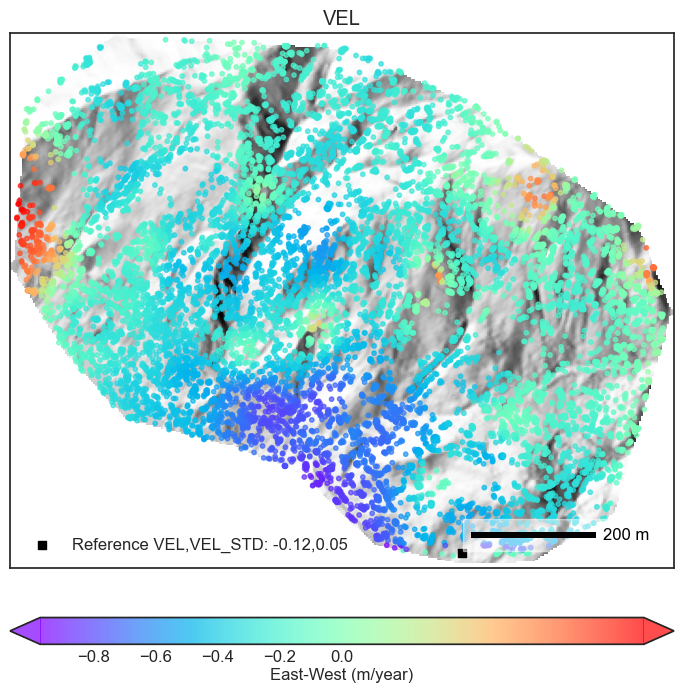

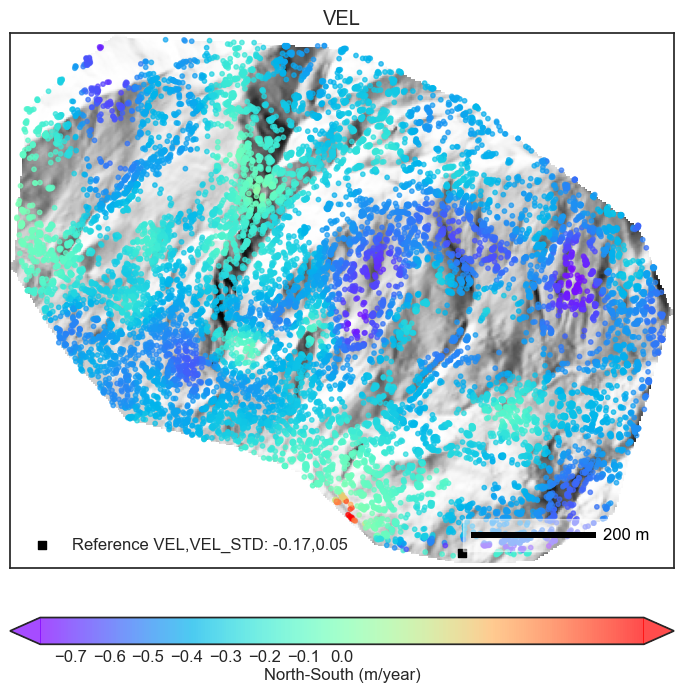

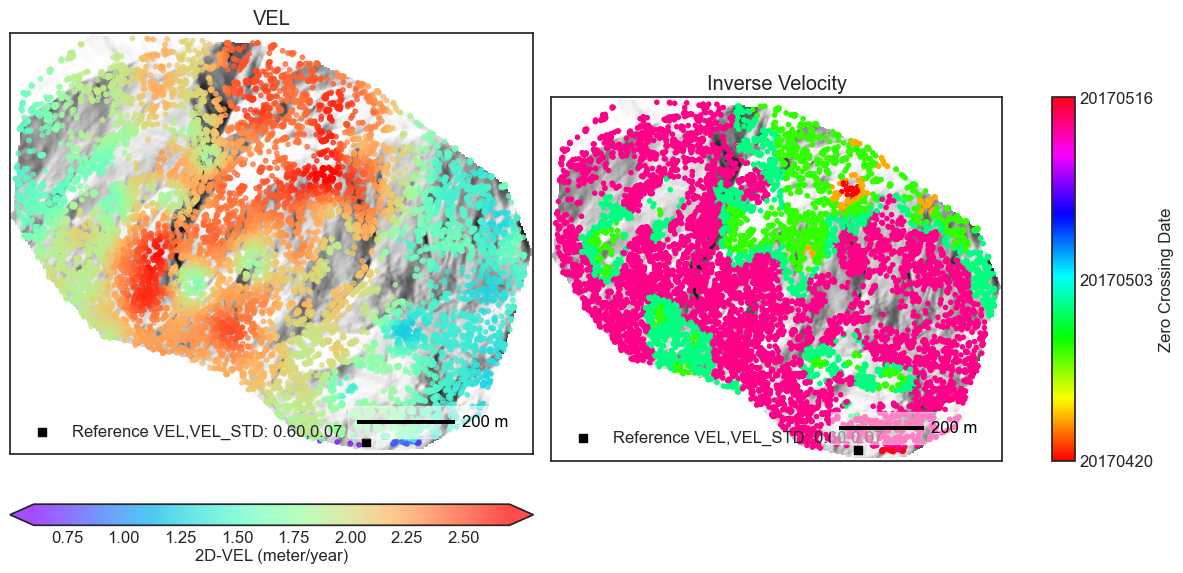

In [2]:
#Visualize Mean Velocity East-West
# if set batch_plot=True it will plot static time series figure for each date acquisition 
import akhdefo_functions
akhdefo_functions.MeanProducts_plot_ts(path_to_shapefile='./data/mudcreek/optical/geo/temp_shapefile_dir/updated_shapefiles/20161002_20170516_20170516_E.shp', 
                                       dem_path='./data/mudcreek/dem.tif', out_folder='./data/mudcreek/optical/Figs_analysis/E', 
                                       color_field="VEL", Set_fig_MinMax=False, 
                                       MinMaxRange=[0, 1.5], opacity=0.7,
                                       cmap='rainbow', point_size=10, 
                                       cbar_label='East-West (m/year)', 
                                       batch_plot=False, plot_inverse_Vel=False)

#Visualize Mean Velocity North-South
akhdefo_functions.MeanProducts_plot_ts(path_to_shapefile='./data/mudcreek/optical/geo/temp_shapefile_dir/updated_shapefiles/20161002_20170516_20170516_N.shp', 
                                       dem_path='./data/mudcreek/dem.tif', out_folder='./data/mudcreek/optical/Figs_analysis/N', 
                                       color_field="VEL", Set_fig_MinMax=False, 
                                       MinMaxRange=[0, 1.5], opacity=0.7,
                                       cmap='rainbow', point_size=10, 
                                       cbar_label='North-South (m/year)', 
                                       batch_plot=False, plot_inverse_Vel=False)

#Visualize Mean Velocity 2D Velocity 
akhdefo_functions.MeanProducts_plot_ts(path_to_shapefile='./data/mudcreek/optical/geo/temp_shapefile_dir/updated_shapefiles/20161002_20170516_20170516_2DVEL.shp', 
                                       dem_path='./data/mudcreek/dem.tif', out_folder='./data/mudcreek/optical/Figs_analysis/2D', 
                                       color_field="VEL", Set_fig_MinMax=False, 
                                       MinMaxRange=[0, 2], opacity=0.7,
                                       cmap='rainbow', point_size=10, 
                                       cbar_label='2D-VEL (meter/year)', 
                                       batch_plot=False, plot_inverse_Vel=True)


![Step 1](./data/mudcreek/movie.gif)

## Interactive Time Series Analysis in a Dash Web App

This plot is part of an interactive web application. Users have the ability to select groups of data points using either the box select or lasso tool, which are superimposed on a satellite image base map. The selected data will then be reflected in the time series chart. Additionally, users can customize the axis labels to suit their dataset; for example, if the dataset measures displacement or velocity in meters, the y-axis label can be adjusted accordingly from the default mm. Furthermore, users can download their analysis and the generated figures directly from the web application.


## Screenshot of the dash appp interface

In [ ]:
#![Step 1](./data/mudcreek/optical/screenshot.png)

## sample exported analysis from Time-series

![dash2d_optical output sample1](./data/mudcreek/optical/2dprofile2.png)


![dash2d_optical output sample2](./data/mudcreek/optical/2dvelmap1.png)

In [16]:
import akhdefo_functions

akhdefo_functions.akhdefo_dashApp(
Path_to_Shapefile='./data/mudcreek/optical/geo/temp_shapefile_dir/updated_shapefiles/20161002_20170516_20170516_2DVEL.shp',
                                  port=8049, BaseMap=True, basemap_type='image')

In [ ]:

akhdefo_functions.akhdefo_dashApp(
Path_to_Shapefile='./data/mudcreek/optical/geo/temp_shapefile_dir/updated_shapefiles/20161002_20170516_20170516_N.shp',
                                  port=8056, BaseMap=True, basemap_type='image')

In [ ]:

akhdefo_dashApp(
Path_to_Shapefile='./data/mudcreek/optical/geo/temp_shapefile_dir/updated_shapefiles/20161002_20170516_20170516_E.shp',
                                  port=8055, BaseMap=True, basemap_type='image')

## Kriging Interpolation using Akhdefo workflow

In [3]:
import akhdefo_functions
from akhdefo_functions import Auto_Variogram

Auto_Variogram(data='./data/mudcreek/optical/geo/temp_shapefile_dir/updated_shapefiles/20161002_20170516_20170516_N.shp', column_attribute='VEL'
               , pixel_size=10, num_chunks=10, out_fileName='N', geo_folder='./data/mudcreek/optical/interpolated_VEL_products1', plot_folder='./data/mudcreek/optical/interpolated_VEL_products1'
               , smoothing_kernel=None, latlon=False, aoi_shapefile='./data/mudcreek/AOI.shp', krig_method='universal', detrend_data=True)


Auto_Variogram(data='./data/mudcreek/optical/geo/temp_shapefile_dir/updated_shapefiles/20161002_20170516_20170516_E.shp', column_attribute='VEL'
               , pixel_size=10, num_chunks=10, out_fileName='E', geo_folder='./data/mudcreek/optical/interpolated_VEL_products1', plot_folder='./data/mudcreek/optical/interpolated_VEL_products1'
               , smoothing_kernel=2, latlon=False, aoi_shapefile='./data/mudcreek/AOI.shp' , krig_method='universal', detrend_data=True)



Auto_Variogram(data='./data/mudcreek/optical/geo/temp_shapefile_dir/updated_shapefiles/20161002_20170516_20170516_2DVEL.shp', column_attribute='VEL'
               , pixel_size=10, num_chunks=10, out_fileName='2DVEL', geo_folder='./data/mudcreek/optical/interpolated_VEL_products1', plot_folder='./data/mudcreek/optical/interpolated_VEL_products1'
               , smoothing_kernel=2, latlon=False, aoi_shapefile='./data/mudcreek/AOI.shp' , krig_method='universal', detrend_data=True)




Auto_Variogram(data='./data/mudcreek/optical/geo/temp_shapefile_dir/updated_shapefiles/20161002_20170516_20170516_2DVEL.shp', column_attribute='aspect'
               , pixel_size=10, num_chunks=10, out_fileName='aspect', geo_folder='./data/mudcreek/optical/interpolated_VEL_products1', plot_folder='./data/mudcreek/optical/interpolated_VEL_products1'
               , smoothing_kernel=2, latlon=False, aoi_shapefile='./data/mudcreek/AOI.shp' , krig_method='universal', detrend_data=True)


kriging succeed with Model: SuperSpherical and score: 0.9979645564083159
kriging succeed with Model: Integral and score: 0.9955343276407005
kriging succeed with Model: Stable and score: 0.9967113051201083
kriging succeed with Model: HyperSpherical and score: 0.9986135030207539


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

## Calculating Approximate Volume of bedrock from the displacement and digitial elevation model

In May 20th 2017, a catstrophic landslide occured in MudCreek, California USA. The Total removal of bedrock and materials measured from lidar and photogrammetry topography change detecion estimate about 5 million cubic yards equall to approximately 3 million cubic meters. In this example, we estimated landslide failure volume based on the time-series linear-annual velocity calulated approximately one year before landslide occur. 


### Our method gave potential landslide volume  two million and nine-handred seventy six thousand cubic meter which is very close to the actual landslide volume measured from lidar dem change detection. 

###
#### Reference for actual volume collapse estimation: ####  https://www.usgs.gov/publications/characterizing-catastrophic-2017-mud-creek-landslide-california-using-repeat-structure 

* All the datasets are avilable on github.

* For the current example, displacemnts dervied from 3 meter optical imagery and the pre collapse dem used 3 meter dem (originally 10m NED but resampled to match the source displacement measurments). it worthwhile to mention that the dem resolution has influnece in the accuracy of the volume estimation. 

In [15]:
import akhdefo_functions
akhdefo_functions.displacement_to_volume(dem_path='./data/mudcreek/dem.tif', aspect_path='./data/mudcreek/optical/interpolated_VEL_products/aspect.tif', 
                                         displacement_path='./data/mudcreek/optical/interpolated_VEL_products/2DVEL.tif', 
                                         slope_output_path='./data/mudcreek/optical/interpolated_VEL_products/slope.tif', 
                                         height_output_path='./data/mudcreek/optical/interpolated_VEL_products/height.tif', volume_output_path='./data/mudcreek/optical/interpolated_VEL_products/volume.tif')

Total Volume: -2976346.0 cubic meter


## Caluclating Plune and Trend and 3D Velocity of deformation

In [ ]:
import akhdefo_functions

akhdefo_functions.Akhdefo_inversion(horizontal_InSAR='./data/mudcreek/optical/interpolated_VEL_products/E.tif', 
                                    Vertical_InSAR='./data/mudcreek/optical/interpolated_VEL_products/height.tif', EW_Akhdefo='./data/mudcreek/optical/interpolated_VEL_products/E.tif', 
                                    NS_Akhdefo='./data/mudcreek/optical/interpolated_VEL_products/N.tif', dem_path='./data/mudcreek/dem.tif', output_folder='./data/mudcreek/optical/interpolated_VEL_products/inversion'
                                    )

## Visualizing Products

* ## Post failure Mudcreek orthophoto
![Alt text](./data/mudcreek/optical/MudCreek27May2017.jpg)

![velocity](./data/mudcreek/optical/Figs_analysis/2DVEL_WithVectorMotion1.png)

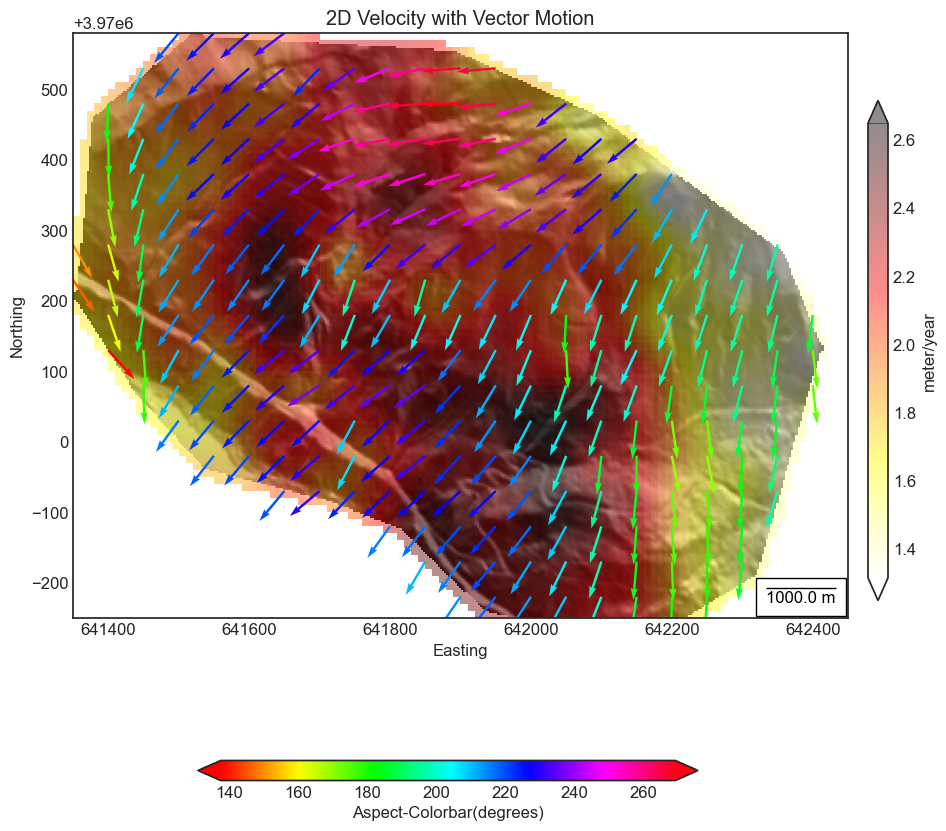

In [8]:
import akhdefo_functions
import cmocean.cm as cmo

akhdefo_functions.akhdefo_viewer(path_to_dem_file='./data/mudcreek/dem.tif', raster_file='./data/mudcreek/optical/interpolated_VEL_products/2DVEL.tif', output_folder='./data/mudcreek/optical/Figs_analysis/', title='2D Velocity with Vector Motion', 
                   pixel_resolution_meters=None, output_file_name="2DVEL_WithVectorMotion_dem_sparse.png", 
                   alpha=1, unit_conversion=None, no_data_mask=True, 
                   colormap='hot_r', min_value=None, max_value=None, 
                   normalize=True, colorbar_label='meter/year', show_figure=True, aspect_raster='./data/mudcreek/optical/interpolated_VEL_products/aspect.tif', cmap_aspect='hsv' , step=5)

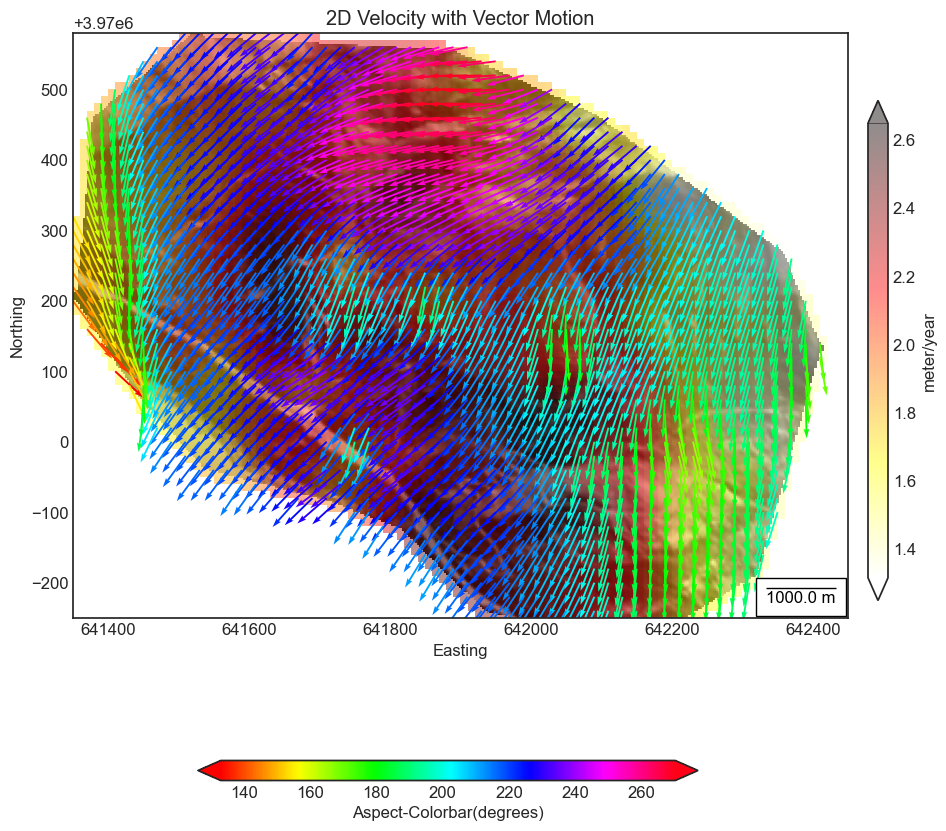

In [9]:
import akhdefo_functions
import cmocean.cm as cmo

akhdefo_functions.akhdefo_viewer(path_to_dem_file='./data/mudcreek/dem.tif', raster_file='./data/mudcreek/optical/interpolated_VEL_products/2DVEL.tif',
                                 output_folder='./data/mudcreek/optical/Figs_analysis/', title='2D Velocity with Vector Motion', 
                   pixel_resolution_meters=None, output_file_name="2DVEL_WithVectorMotion_dem.png", 
                   alpha=1, unit_conversion=None, no_data_mask=True, 
                   colormap='hot_r', min_value=None, max_value=None, 
                   normalize=True, colorbar_label='meter/year', show_figure=True, aspect_raster='./data/mudcreek/optical/interpolated_VEL_products/aspect.tif', cmap_aspect='hsv' , step=2)

## Plunge of displacement Velocity

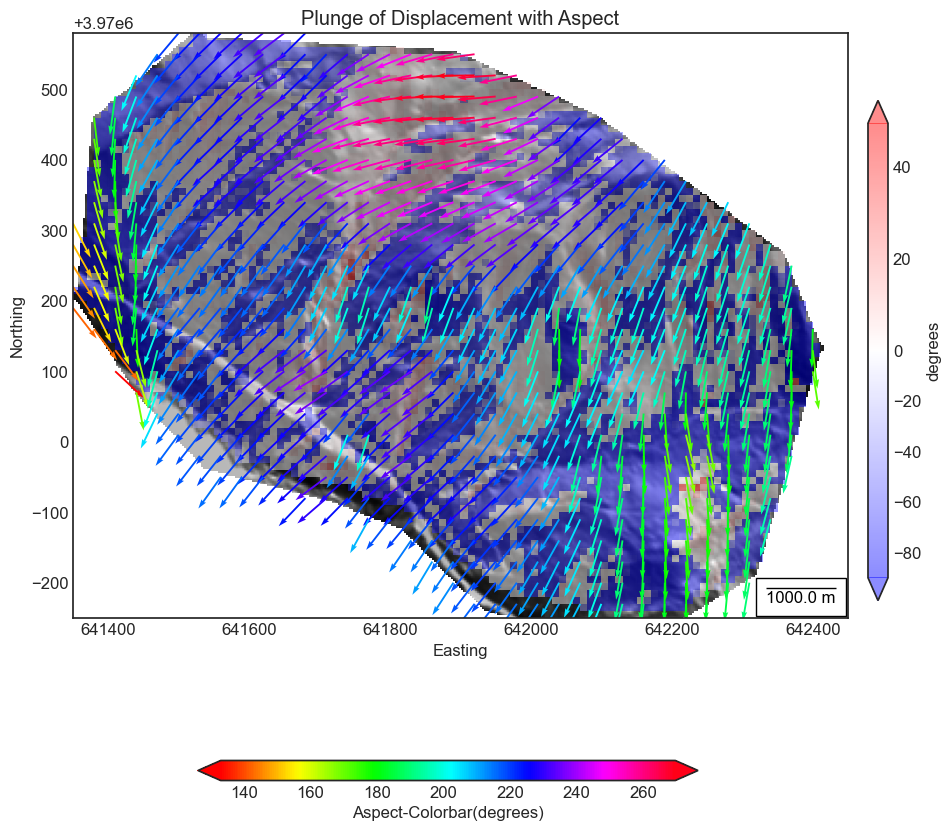

In [10]:
import akhdefo_functions
import cmocean.cm as cmo

akhdefo_functions.akhdefo_viewer(path_to_dem_file='./data/mudcreek/dem.tif', raster_file='./data/mudcreek/optical/interpolated_VEL_products/inversion/plung_degree.tif', 
                                 output_folder='./data/mudcreek/optical/Figs_analysis/', title='Plunge of Displacement with Aspect', 
                   pixel_resolution_meters=None, output_file_name="Plunge_VEL.png", 
                   alpha=1, unit_conversion=None, no_data_mask=True, 
                   colormap='bwr', min_value=None, max_value=None, 
                   normalize=True, colorbar_label='degrees', show_figure=True, aspect_raster='./data/mudcreek/optical/interpolated_VEL_products/aspect.tif', cmap_aspect='hsv' , step=3)

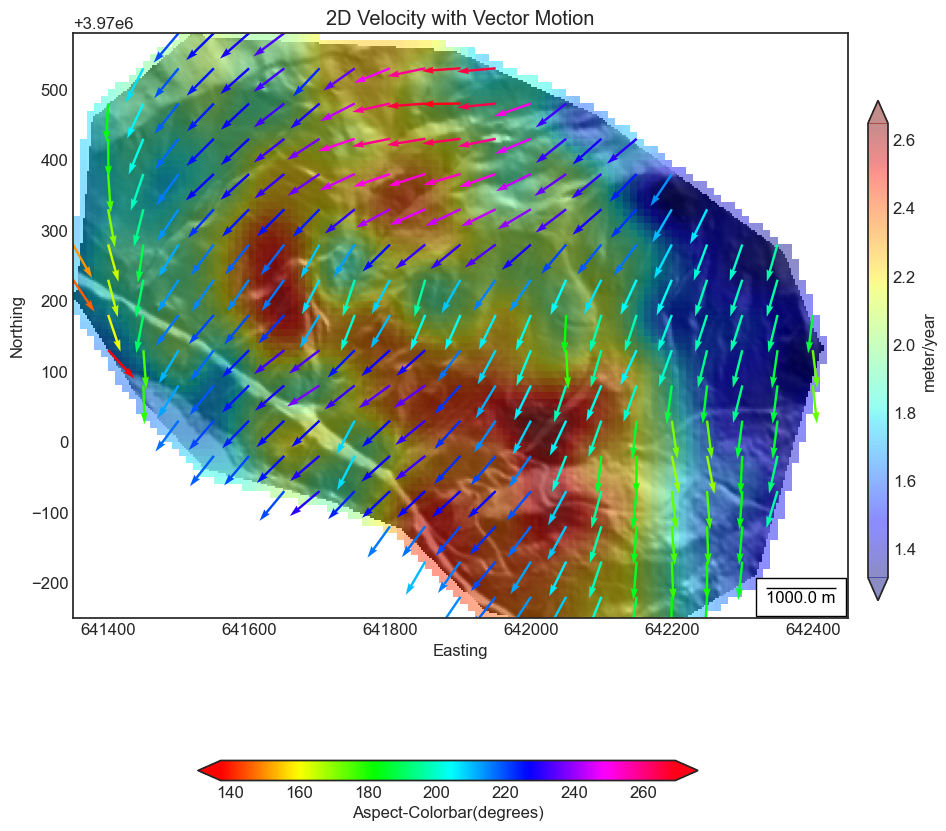

In [11]:
import akhdefo_functions
import cmocean.cm as cmo

akhdefo_functions.akhdefo_viewer(path_to_dem_file='./data/mudcreek/dem.tif', raster_file='./data/mudcreek/optical/interpolated_VEL_products/2DVEL.tif', output_folder='./data/mudcreek/optical/Figs_analysis/', title='2D Velocity with Vector Motion', 
                   pixel_resolution_meters=None, output_file_name="2DVEL_WithVectorMotion.png", 
                   alpha=1, unit_conversion=None, no_data_mask=True, 
                   colormap='jet', min_value=None, max_value=None, 
                   normalize=True, colorbar_label='meter/year', show_figure=True, aspect_raster='./data/mudcreek/optical/interpolated_VEL_products/aspect.tif', cmap_aspect='hsv' , step=5)

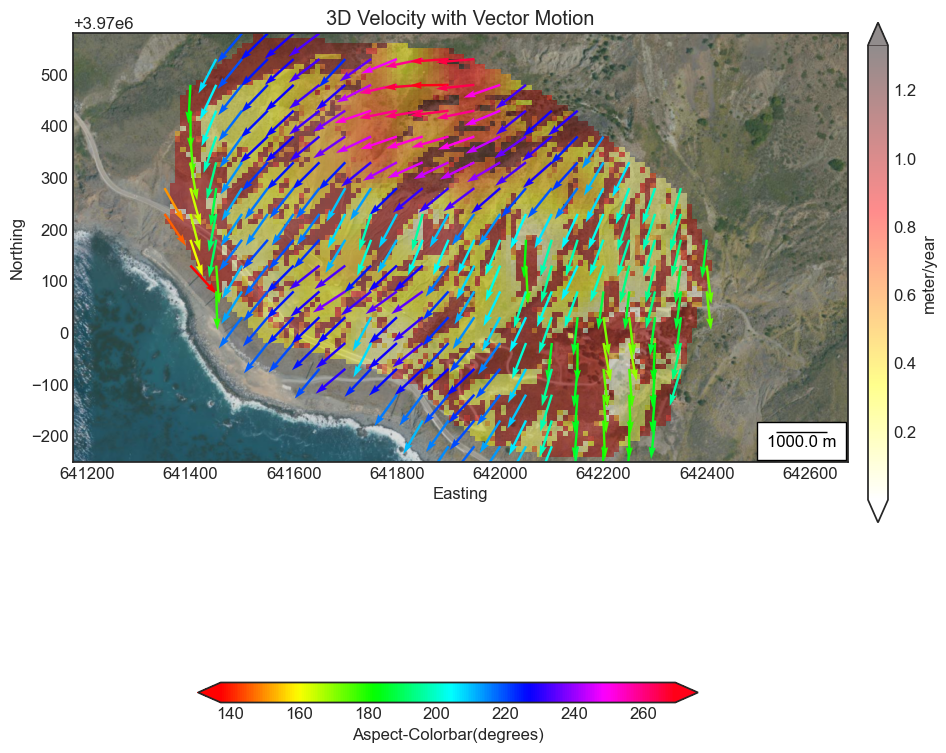

In [12]:
import akhdefo_functions
import cmocean.cm as cmo

akhdefo_functions.akhdefo_viewer(path_to_dem_file='./data/mudcreek/basemap.tif', raster_file='./data/mudcreek/optical/interpolated_VEL_products/inversion/D3D.tif', output_folder='./data/mudcreek/optical/Figs_analysis/', title='3D Velocity with Vector Motion', 
                   pixel_resolution_meters=None, output_file_name="3DVEL_WithVectorMotion.png", 
                   alpha=1, unit_conversion=None, no_data_mask=True, 
                   colormap='hot_r', min_value=None, max_value=None, 
                   normalize=True, colorbar_label='meter/year', show_figure=True, aspect_raster='./data/mudcreek/optical/interpolated_VEL_products/aspect.tif', cmap_aspect='hsv' , step=5)

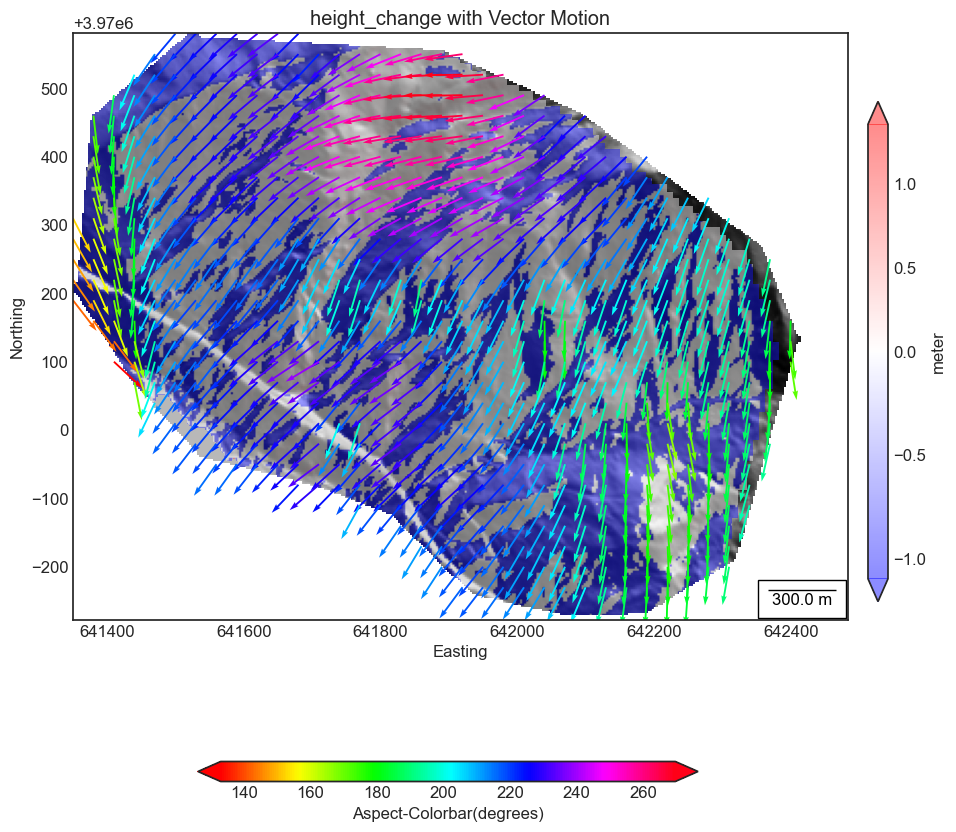

In [13]:
import akhdefo_functions
import cmocean.cm as cmo

akhdefo_functions.akhdefo_viewer(path_to_dem_file='./data/mudcreek/dem.tif', raster_file='./data/mudcreek/optical/interpolated_VEL_products/height.tif', 
                                 output_folder='./data/mudcreek/optical/Figs_analysis/', title='height_change with Vector Motion', 
                   pixel_resolution_meters=None, output_file_name="height_change_WithVectorMotion.png", 
                   alpha=1, unit_conversion=None, no_data_mask=True, 
                   colormap='bwr', min_value=None, max_value=None, 
                   normalize=True, colorbar_label='meter', show_figure=True, aspect_raster='./data/mudcreek/optical/interpolated_VEL_products/aspect.tif', cmap_aspect='hsv' , step=3)

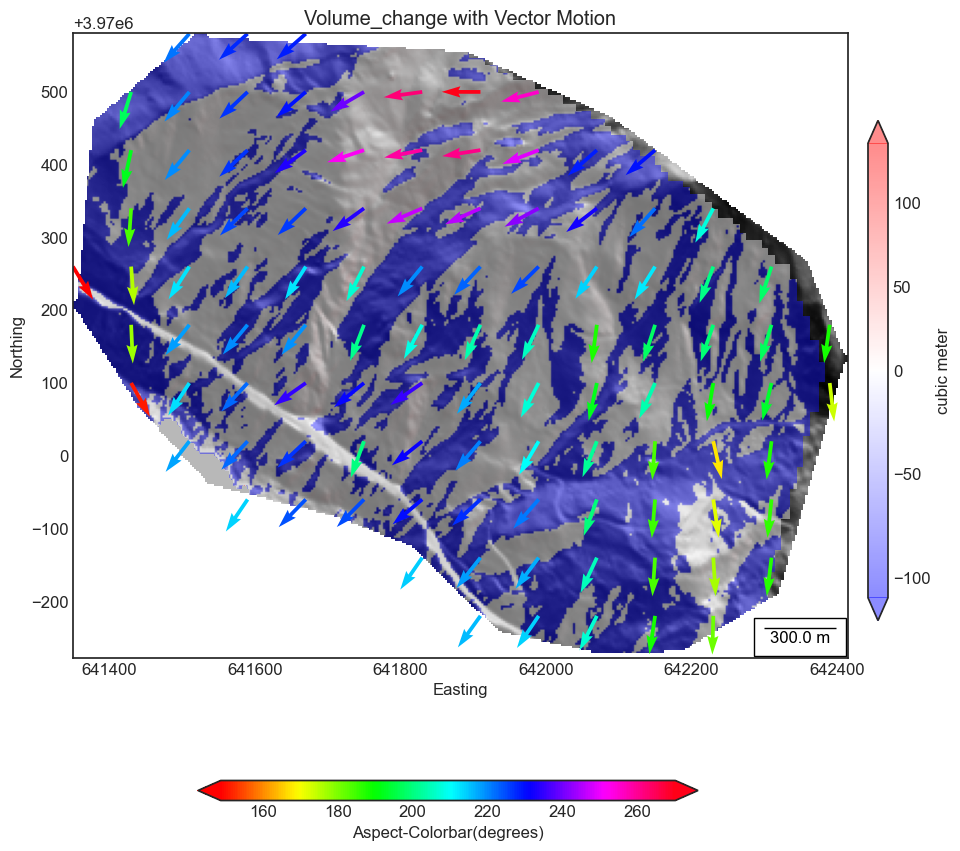

In [14]:
import akhdefo_functions
import cmocean.cm as cmo

akhdefo_functions.akhdefo_viewer(path_to_dem_file='./data/mudcreek/dem.tif', raster_file='./data/mudcreek/optical/interpolated_VEL_products/volume.tif', 
                                 output_folder='./data/mudcreek/optical/Figs_analysis/', title='Volume_change with Vector Motion', 
                   pixel_resolution_meters=None, output_file_name="Volume_change_WithVectorMotion.png", 
                   alpha=1, unit_conversion=None, no_data_mask=True, 
                   colormap='bwr', min_value=None, max_value=None, 
                   normalize=True, colorbar_label='cubic meter', show_figure=True, aspect_raster='./data/mudcreek/optical/interpolated_VEL_products/aspect.tif', cmap_aspect='hsv' , step=8)

## Creating Time-series cummulative GIF animation map

In [ ]:
import akhdefo_functions
import cmocean.cm as cmo
#Visualize Mean Velocity 2D Velocity 
akhdefo_functions.MeanProducts_plot_ts(path_to_shapefile='./data/mudcreek/optical/geo/temp_shapefile_dir/updated_shapefiles/20161002_20170516_20170516_2DVEL.shp', 
                                       dem_path='./data/mudcreek/dem.tif', out_folder='./data/mudcreek/optical/Figs_analysis/2D_TS_map', 
                                       color_field="", Set_fig_MinMax=True, 
                                       MinMaxRange=[0, 2], opacity=0.4,
                                       cmap='hot_r', point_size=10, 
                                       cbar_label='2D VELOCITY in (meter)\n MudCreek 2017-Landslide\n Processed by: akhdefo software using optical imagery \n from 20161002 to 20170516', 
                                       batch_plot=True)

In [ ]:
import os
import imageio
from PIL import Image

# Parameters
images_folder = './data/mudcreek/optical/Figs_analysis/2D_TS_map'
output_gif_path = './data/mudcreek/optical/Figs_analysis/2D_GIFoutput1.gif'
frame_duration = 750 # seconds
transition_frames = 3  # number of frames for the transition

# Function to create a cross-fade transition
def crossfade_images(image1, image2, steps):
    transition_images = []
    for i in range(steps):
        # Calculate the alpha for each step
        alpha = i / float(steps)
        # Ensure both images have the same mode for blending
        if image1.mode != image2.mode:
            image2 = image2.convert(image1.mode)
        blended = Image.blend(image1, image2, alpha)
        transition_images.append(blended)
    return transition_images

# Load and sort images
image_files = sorted([os.path.join(images_folder, file) for file in os.listdir(images_folder) if file.endswith(('.png', '.jpg', '.jpeg'))])
images = [Image.open(file).convert('RGBA') for file in image_files]

# Create frames with transitions
frames = []
for i in range(len(images)):
    frames.append(images[i])  # Add the original frame
    if i < len(images) - 1:  # If not the last image, create a transition to the next
        frames.extend(crossfade_images(images[i], images[i + 1], transition_frames))

# Save frames to disk temporarily to avoid large memory usage
temp_files = []
for i, frame in enumerate(images):
    temp_file_path = f'temp_frame_{i}.png'
    frame.save(temp_file_path, 'PNG')
    temp_files.append(temp_file_path)

# Create and save the GIF
with imageio.get_writer(output_gif_path, mode='I', duration=frame_duration, loop=0) as writer:
    for filename in temp_files:
        image = imageio.imread(filename)
        writer.append_data(image)

# Clean up the temporary files
for filename in temp_files:
    os.remove(filename)

print(f'GIF saved to {output_gif_path}')


* This map is produced from InSAR Time-series by JPL


![insar_jpl](./data/mudcreek/optical/Figs_analysis/insar_ts_nasa.gif)

* This Map is produced by Akhdefo using Optical Imagery


![akhdefo_ts_anim](./data/mudcreek/optical/Figs_analysis/2D_GIFoutput1.gif)

## A small python script to create location map with inset map

In [ ]:
import pandas as pd
import plotly.graph_objects as go

#Use  Your Mapbox access token
mapbox_access_token = ''

# Data for points
data = {
    "Latitude": [43.000364, 35.865, 49.68],
    "Longitude": [ 76.995878, -121.428, -123.140],
    "Label": ['Morenny-Kazakhstan', 'Mudcreek-USA', 'Squamish Chief-Canada'] , "point_color":['red', 'green', 'yellow']
}
df = pd.DataFrame(data)

# Creating the main figure
fig = go.Figure()

go.Layout( font=dict(size=12, color=row['point_color']))

# Adding the main map with a 2D projection
fig.add_trace(
    go.Scattergeo(
        lon=df['Longitude'],
        lat=df['Latitude'],
        text=df['Label'],
        mode='markers+text',
        marker=dict(size=10, color='red'),
        textposition='top center',
        name="Main Map"  # Name of the main trace in the legend
        , textfont=dict(size=20, color='red', family='Arial, sans-serif'), # Updated text font
    )
)

# Setting the layout for the main map
fig.update_layout(
    title_text='Main Map with Inset Maps',
    geo=dict(
        scope='world',
        projection_type='equirectangular',
        showcountries=True,
        countrycolor="DarkBlue",
        domain=dict(x=[0, 0.5], y=[0.5, 1])  # Adjusted domain for the main map, 
        
        
         
    )
)
# Adding inset maps with Mapbox satellite imagery
for i, row in df.iterrows():
    fig.add_trace(
        go.Scattermapbox(
            lat=[row['Latitude']],
            lon=[row['Longitude']],
            text=row['Label'],
            mode='markers+text', name=row['Label'],
            marker=dict(size=20, color=row['point_color']),
            textposition='bottom center',
            subplot='mapbox' + str(i + 2),  # Creating a subplot for each inset map
             
        )
    )
    fig.layout['mapbox' + str(i + 2)] = dict(
        accesstoken=mapbox_access_token,
        domain=dict(
            x=[0.25 * i, 0.25 * (i + 1)],  # Adjust x values for horizontal alignment
            y=[0.05, 0.3]  # Inset maps at the bottom
        ),
        center=dict(lat=row['Latitude'], lon=row['Longitude']),
        zoom=5,
        style='satellite-streets',  # Using Mapbox satellite style
    )
    # Set left, right, top, and bottom margins to 0)

# Save the combined map as an HTML file
file_path = "./data/combined_geo_map.html"
fig.write_html(file_path)
# Save the figure as a PNG file
# Specify the file path for the PNG file
png_file_path = "./data/combined_geo_map.png"

fig.write_image(png_file_path)
#fig.show()
